# Analisis LSTM

## Import Modul

In [1]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
d_cardio = pd.read_excel('cardio_train.xlsx')
print(d_cardio.shape)

(70000, 13)


In [3]:
print(d_cardio.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [4]:
d_cardio.drop(labels='id', axis = 'columns', inplace = True)
d_cardio.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
d_cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [6]:
d_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
d_cardio=abs(d_cardio)

In [8]:
d_cardio.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.841429,96.632414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,153.991223,188.471505,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
Y = d_cardio.cardio
X = d_cardio
X.drop(['cardio'],axis = 1, inplace = True)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=143)
X_train = np.array(X_train).reshape(-1, 1, 11)
X_test  = np.array(X_test).reshape(-1, 1, 11)

In [11]:
print(len(X_test))

21000


In [12]:
#train model
model = Sequential()
model.add(LSTM(units=100, return_sequences = True, input_shape =(1,11)))
model.add(Dropout(0.2))
# model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.2))
# model.add(LSTM(units=100, return_sequences = True))
# model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))
model.add(Dense(units =1))
model.compile(optimizer='adam',loss="binary_crossentropy", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 100)            44800     
                                                                 
 dropout (Dropout)           (None, 1, 100)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 125,301
Trainable params: 125,301
Non-trainable params: 0
_________________________________________________________________


In [13]:
hist = model.fit(X_train, Y_train, epochs = 30, batch_size = 16, verbose=2)

Epoch 1/30
3063/3063 - 30s - loss: 0.7025 - accuracy: 0.5006 - 30s/epoch - 10ms/step
Epoch 2/30
3063/3063 - 21s - loss: 0.6979 - accuracy: 0.4982 - 21s/epoch - 7ms/step
Epoch 3/30
3063/3063 - 21s - loss: 0.6971 - accuracy: 0.4950 - 21s/epoch - 7ms/step
Epoch 4/30
3063/3063 - 22s - loss: 0.6961 - accuracy: 0.4982 - 22s/epoch - 7ms/step
Epoch 5/30
3063/3063 - 20s - loss: 0.6950 - accuracy: 0.5013 - 20s/epoch - 6ms/step
Epoch 6/30
3063/3063 - 19s - loss: 0.6943 - accuracy: 0.4967 - 19s/epoch - 6ms/step
Epoch 7/30
3063/3063 - 19s - loss: 0.6936 - accuracy: 0.5019 - 19s/epoch - 6ms/step
Epoch 8/30
3063/3063 - 20s - loss: 0.6934 - accuracy: 0.5022 - 20s/epoch - 6ms/step
Epoch 9/30
3063/3063 - 19s - loss: 0.6934 - accuracy: 0.4993 - 19s/epoch - 6ms/step
Epoch 10/30
3063/3063 - 19s - loss: 0.6933 - accuracy: 0.4982 - 19s/epoch - 6ms/step
Epoch 11/30
3063/3063 - 21s - loss: 0.6932 - accuracy: 0.5020 - 21s/epoch - 7ms/step
Epoch 12/30
3063/3063 - 20s - loss: 0.6932 - accuracy: 0.5003 - 20s/epoch

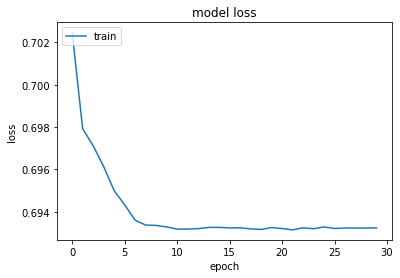

In [14]:
# plotting the history
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [15]:
# prediction results
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred.argmax(axis=1))
print('Test size = 0.3')
print('====================')
print('Accuracy: %f' % accuracy)

Test size = 0.3
Accuracy: 0.498429
